In [1]:
from utils import *
from tests import *
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


########## LOADING THE IMAGE ##############
1226
1991
########## CROPPING THE IMAGE ##############
(54, 224, 224, 1)
Loading /media/maewanto/B498-74ED/Data_projet_apprentissage/models/model_yang.json
Loading /media/maewanto/B498-74ED/Data_projet_apprentissage/models_weights/model_yang_weights.hdf5
########## PREDICTING THE CROPS ##############
########## RECONSTITUTING THE IMAGE ##############


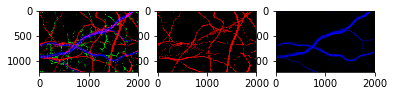

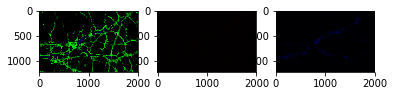

In [3]:
actin, axon, dendrite = test_image(120, "model_yang", thresh_results=False, batch_size=16)

In [ ]:
from multi_testing import *
%load_ext autoreload
%autoreload 2

In [ ]:
models_to_test = [
    {
        'name': 'model_yang',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False
    },
    {
        'name': 'model_yang_with_conv2dtranspose',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False
    }
]

run_multi_tests(models_to_test)

In [ ]:
X_train, X_test, y_train, y_test = load_dataset(False, 10)

In [ ]:
save_dataset(2, 0.1)

In [ ]:
min_ones_ratio = 0.1
min_ones = crop_size * min_ones_ratio
cpt = 0
for i in range(0, 1040):
    if i % 10 == 0:
        print(i)
    x = np.load(folder_images_saving_train_x + "/" + str(i) + ".npy")
    y = np.load(folder_images_saving_train_y + "/" + str(i) + ".npy")
    crops_x, crops_y = get_all_crops(x, y)
    length = crops_x.shape[0]
    for j in range(0, length):
        # We do not want to keep too many black crops, so we make sure there is some data in both train and label
        # matrices before taking the flips.
        if np.sum(crops_x[j]) > min_ones and np.sum(crops_y[j, :, :, 0]) > min_ones and np.sum(crops_y[j, :, :, 1]) > min_ones:
            flips_x, flips_y = get_flips_images(crops_x[j], crops_y[j])
            for k in range(0, 3):
                cpt += 1
        else:
            cpt += 1

print("++++")
print(cpt)

In [ ]:
# 118145
with h5py.File(main_folder_path + "/test.hdf5", 'w') as f:
    dataset = f.create_dataset("X", (cpt, crop_size, crop_size, 1))
    
with h5py.File(main_folder_path + "/test.hdf5", 'a') as f:
    f['X'][:10] = np.ones((10, crop_size, crop_size, 1))

# print(dataset.shape)
# dataset[:10]